In [ ]:
#Water Bodies Detection from Satellite Imagery

**water bodies in satellite imagery**

In [ ]:
pip install rasterio


In [ ]:
#tif >> to stores satalite image

Tag Image File Format, abbreviated TIFF or TIF, is an image file format for storing raster graphics images, popular among graphic artists, the publishing industry, and photographers

In [ ]:
#rasterio >> to view satalite image

Geographic information systems use GeoTIFF and other formats to organize and store gridded, or raster, datasets. Rasterio reads and writes these formats and provides a Python API based on N-D arrays.

In [ ]:
import rasterio as rio
from rasterio.plot import show

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ds=rio.open(r"/content/drive/My Drive/project/y_test.tif")

In [ ]:
ds.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 2509,
 'height': 1677,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(8.983152841195215e-05, 0.0, 85.34704868209909,
        0.0, -8.983152841195215e-05, 27.35792248327479)}

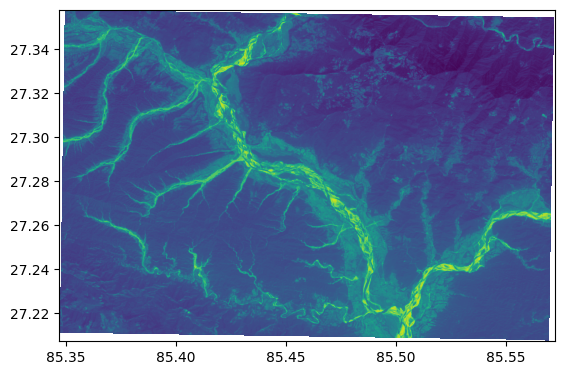

<Axes: >

In [25]:
show(ds)

In [ ]:
ds=rio.open(r"/content/drive/My Drive/project/y_train.tif")

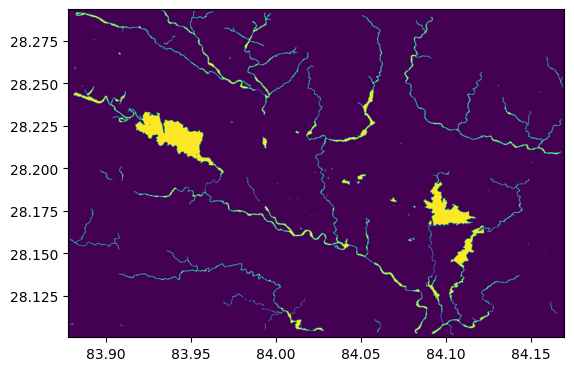

<Axes: >

In [ ]:
show(ds)

In [ ]:
ds=rio.open(r"/content/drive/My Drive/project/X_train.tif")

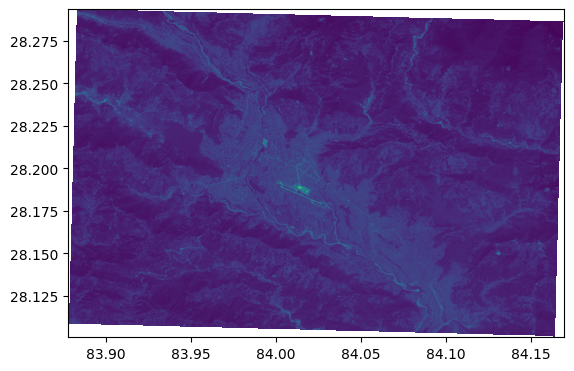

<Axes: >

In [ ]:
show(ds)

In [ ]:
ds=rio.open(r"/content/drive/My Drive/project/X_test.tif")

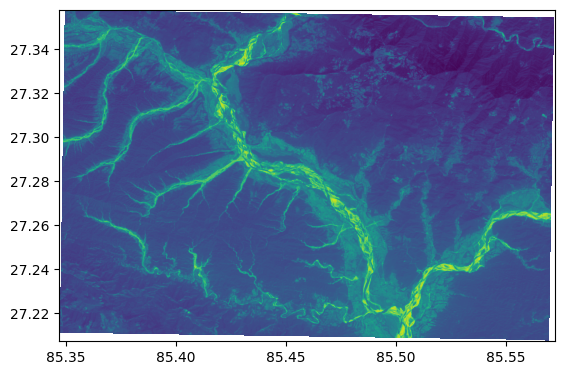

<Axes: >

In [ ]:
show(ds)

**Now Actual code is hear**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio

In [42]:
ds=rio.open(r"/content/drive/My Drive/project/X_train.tif")

In [43]:
arr= ds.read()
arr

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [44]:
arr=np.where(np.isnan(arr), 0,arr)
arr


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtyp

In [45]:
arr.shape

#4 show just like RBC

(4, 2147, 3246)

In [33]:
arr=np.moveaxis(arr, 0,-1)
arr.shape

(2147, 3246, 4)

In [36]:
X_train=np.reshape(arr, (arr.shape[0]* arr.shape[1], arr.shape[2]))

X_train.shape  # row * col

(6969162, 4)

In [37]:
# writting all the code in one cell

In [108]:
ds=rio.open(r"/content/drive/My Drive/project/X_train.tif")
arr = ds.read()

arr = np.where(np.isnan(arr), 0, arr)
arr = np.moveaxis(arr, 0, -1)

nrow_train = arr.shape[0]
ncol_train = arr.shape[1]

X_train = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
X_train.shape

(6969162, 4)

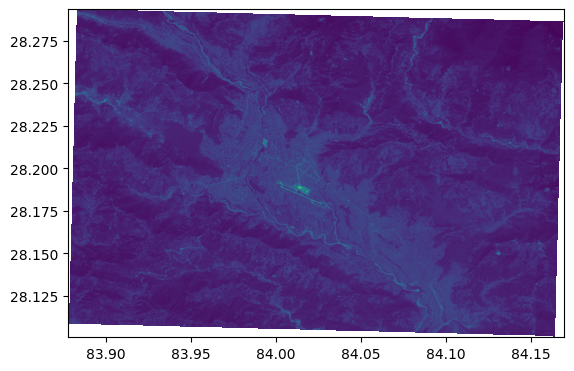

<Axes: >

In [109]:
show(ds)

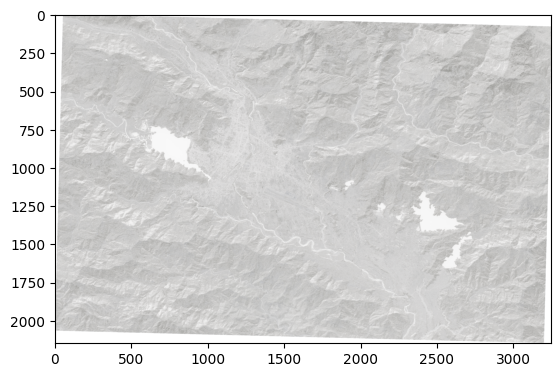

In [107]:

X_train_reshaped = X_train.reshape(nrow_train, ncol_train, 4)
plt.imshow(X_train_reshaped)  
plt.show()

In [67]:
ds=rio.open(r"/content/drive/My Drive/project/y_train.tif")

arr=ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(arr == np.nan, 0, arr)
y_train = arr.reshape(-1)

# nrow_test = arr.shape[0]
# ncol_test = arr.shape[1]

y_train.shape

(6969162,)

In [104]:
# ncol_test = arr.shape[1]
#ncol_train = arr.shape[1]  train or test same raha ga as it it jatna row and coloum ha

In [103]:
ds=rio.open(r"/content/drive/My Drive/project/X_test.tif")

arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)

nrow_test = arr.shape[0]
ncol_test = arr.shape[1]

X_test = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
X_test.shape



(4207593, 4)

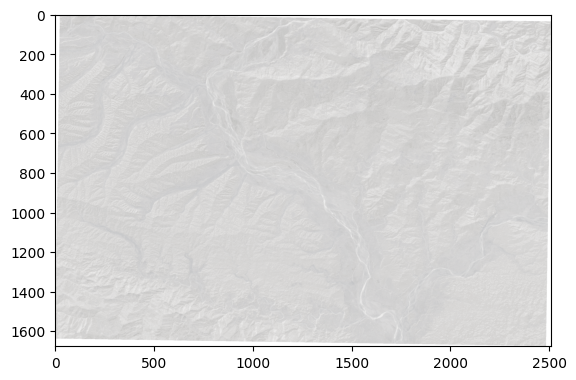

In [106]:

X_test_reshaped = X_test.reshape(nrow_test, ncol_test, 4)
plt.imshow(X_test_reshaped)  
plt.show()

In [92]:
ds=rio.open(r"/content/drive/My Drive/project/y_test.tif")

arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)
y_test = arr.reshape(-1)

nrow_test = arr.shape[0]
ncol_test = arr.shape[1]

y_test.shape


(4207593,)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42, verbose=3, n_jobs=-1)

In [52]:
rfc.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.3min finished


RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42, verbose=3)

In [53]:
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   12.3s finished


In [54]:
from sklearn.metrics import classification_report


In [55]:
# o > non water bodies and 1 > water bodies

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94   3682263
           1       0.71      0.06      0.12    525330

    accuracy                           0.88   4207593
   macro avg       0.80      0.53      0.53   4207593
weighted avg       0.86      0.88      0.83   4207593



In [58]:
y_pred.shape
#y_test same

(4207593,)

In [99]:
y_pred_reshaped = y_pred.reshape(nrow_test, ncol_test)
y_test_reshaped = y_test.reshape(nrow_test, ncol_test)
X_test_reshaped = X_test.reshape(nrow_test, ncol_test, 4) # 4 x_test wala ka ha jo RBC ka jasa ha
print(y_pred_reshaped.shape, X_test_reshaped.shape)

(1677, 2509) (1677, 2509, 4)


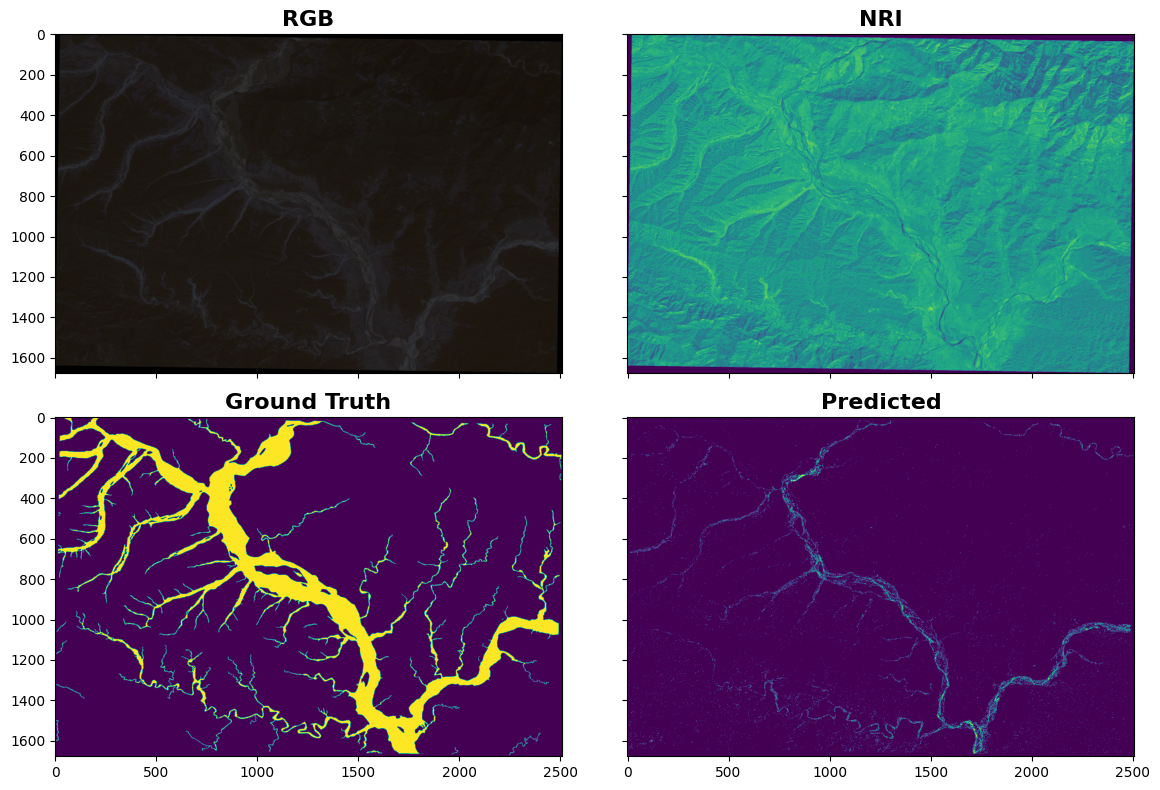

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,8))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.set_title("RGB", fontweight='bold', fontsize='16')
ax1.imshow(X_test_reshaped[:,:,:3])  # 3 RGB

ax2.set_title("NRI", fontweight='bold', fontsize='16')
ax2.imshow(X_test_reshaped[:,:,-1])  # 4 th value is NRI

ax3.set_title("Ground Truth", fontweight='bold', fontsize='16')
ax3.imshow(y_test_reshaped[:,:])

ax4.set_title("Predicted", fontweight='bold', fontsize='16')
ax4.imshow(y_pred_reshaped[:,:])

plt.tight_layout()

plt.show()